## Implementación de Kmeans (clustering)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

Vamos a usar el dataset iris. Este dataset esta pensado para clasificación de 3 familias de un especie de planta, pero también lo podemos usar para clustering si no usamos la variable respuesta:

In [3]:
type(iris)

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

In [8]:
import numpy as np
from scipy.spatial import distance #scipy implementa calculos matematicos

# kmeans: siempre necesita el nº de cluster que vamos a utilizar. 

class KMeans:
    
    def __init__(self, K, distance=distance.euclidean):
        self.K = K
        self.distance = distance #asignamos una funcion a una varaible. funcion para medir la distancia. Antes estabamos pasando funciones.
        self.centroids = []
        self.history = []
        
    
    def fit(self, X, verbose=True):
        # inicializamos el historial y una matrix para guardar la distancia de 
        # cada punto a cada centro
        self.history = []
        distances = np.zeros(shape=(X.shape[0], self.K+1))

        # centros iniciales
        idx = np.random.randint(X.shape[0], size=self.K) #randint: crea nº enteros
        self.centroids = X[idx,:]
        
        # calculamos la distancia de cada punto a cada centro
        self._calculate_distances(distances, X)

        # asignamos el cluster más cercano a cada instancia
        distances[:, self.K] = np.argmin(distances[:,:self.K], axis=1) #axis=1:por fila. Vamos para cada fila a buscar en que cluster esta el minimo y la ultima columna va a contener el nº de cluster seleccionado.
        
        # agremos al historial
        self.history.append( (self.centroids, distances[:, self.K]) )
        
        # calculamos el error total (la suma de las distancias)
        error = self._calculate_error(distances)

        if verbose:
            print("Puntos iniciales:")
            self._print_cetroids(self.centroids)
            print("Error: %f" % error)
        
        # variable para controlar cuando parar (no se encuentra más mejora)
        stop = False
        
        while not stop:

            # calculamos los nuevos centros
            for i in range(self.K):
                self.centroids[i] = X[np.where(distances[:,self.K] == i)].mean(axis=0) #nuevo centroide. Se calcula como la media de todas las muestras
                
            # calculamos la distancia de cada punto a cada centro
            self._calculate_distances(distances, X)
            
            #asignamos el cluster más cercano a cada instancia
            distances[:, self.K] = np.argmin(distances[:,:self.K], axis=1)
            
            # agremos al historial
            self.history.append( (self.centroids, distances[:, self.K]) )

            # calculamos el nuevo error
            new_error = self._calculate_error(distances)
            
            # paramos en caso de no mejorar
            stop = new_error == error #esto significa que el algoritmo converge
            error = new_error
            
            if verbose:
                print("Nuevos centros:")
                self._print_cetroids(self.centroids)
                print("Error: %f" % error)
                
        
    def predict(self, X):
        
        distances = np.zeros(shape=(X.shape[0], self.K+1))
        
        self._calculate_distances(distances, X)
            
        #asignamos el cluster más cercano a cada instancia
        distances[:, self.K] = np.argmin(distances[:,:self.K], axis=1)
        
        return distances[:, self.K]
             
            
    def _calculate_error(self, distances):
        error = 0
        for i in range(self.K):
            error += distances[np.where(distances[:,self.K] == i), i].sum()
            
        return error
        
    def _calculate_distances(self, distances, X):
        #calculamos las distancias de cada instancia a los centros
        for i in range(self.K):
            for j in range(X.shape[0]):
                distances[j,i] = self.distance(X[j], self.centroids[i])
                
    def _print_cetroids(self, centroids):
        
        formatting = ", ".join(["(%0.3f,%0.3f)" for i in range(len(centroids))])
        params = [e for t in centroids for e in t]
        print(formatting % tuple(params))

        
        

Una vez tenemos la implementación, no creamos el objeto indicando que queremos encontrar 3 clusters y entrenamos (fit):

In [9]:
kmeans = KMeans(3)
history = kmeans.fit(X)

Puntos iniciales:
(4.900,3.100), (5.400,3.900), (4.600,3.100)
Error: 146.412664
Nuevos centros:
(5.517,2.829), (6.371,3.269), (4.527,3.100)
Error: 80.654393
Nuevos centros:
(5.587,2.808), (6.598,3.095), (4.849,3.300)
Error: 66.443274
Nuevos centros:
(5.672,2.670), (6.707,3.025), (5.006,3.418)
Error: 63.201205
Nuevos centros:
(5.744,2.686), (6.780,3.058), (5.006,3.418)
Error: 62.834329
Nuevos centros:
(5.763,2.690), (6.802,3.069), (5.006,3.418)
Error: 62.857090
Nuevos centros:
(5.774,2.692), (6.813,3.074), (5.006,3.418)
Error: 62.879823
Nuevos centros:
(5.774,2.692), (6.813,3.074), (5.006,3.418)
Error: 62.879823


Podemos realizar el clustering sobre nuevos datos. En este caso lo hacemos sobre los mismo para compararlos con las clases reales:

In [10]:
predict = kmeans.predict(X)
predict

array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,
        1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,
        1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  0.,  1.,  1.,  0.])

Representamos los cluster con un scatter e indicamos que asigne un color a cada cluster:

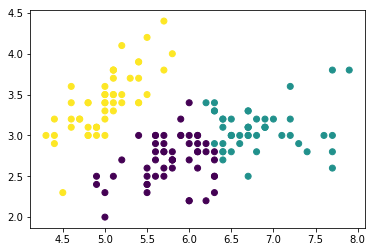

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=predict)

Representamos igualmente los grupos reales:

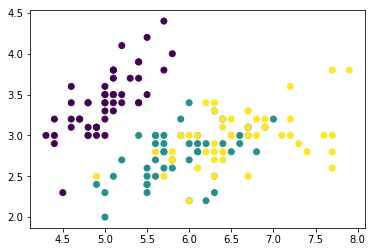

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=Y)